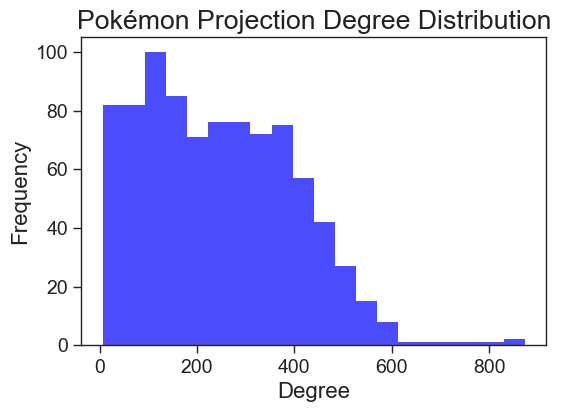

Bipartite projection completed and data exported.


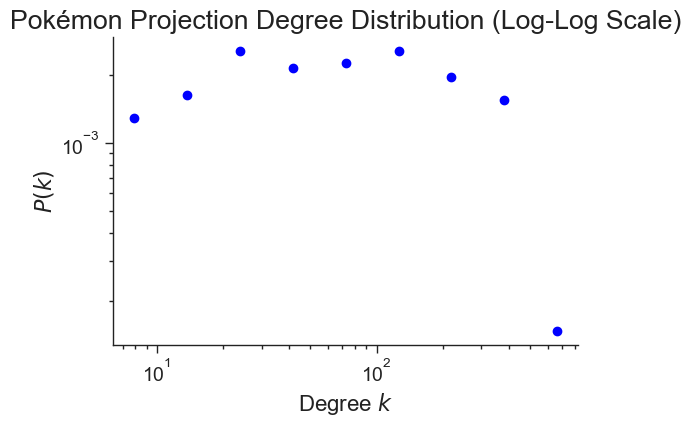

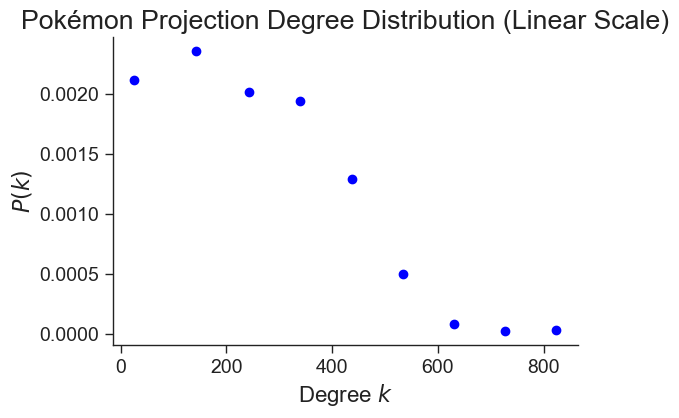

In [46]:
import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Load nodes
pokemon = pd.read_csv('../../datasets/clean/pokemon_nodes.csv')
episodes = pd.read_csv('../../datasets/clean/episode_nodes.csv')

pokemon_ids = set(pokemon['Id'])
episode_ids = set(episodes['Id'])

# Load bipartite graph
G = nx.Graph()
G.add_nodes_from(pokemon_ids, bipartite=0)
G.add_nodes_from(episode_ids, bipartite=1)
G_temp = nx.read_edgelist('../../datasets/clean/edge_list.csv', delimiter=",", nodetype=int, encoding='utf-8', comments="Source")
G.add_edges_from(G_temp.edges())


# Project Pokémon nodes onto a new weighted graph
pokemon_projection = nx.Graph()

for episode in episode_ids:
    neighbors = list(G.neighbors(episode))  # Pokémon appearing in this episode
    for i in range(len(neighbors)):
        for j in range(i + 1, len(neighbors)):
            if pokemon_projection.has_edge(neighbors[i], neighbors[j]):
                pokemon_projection[neighbors[i]][neighbors[j]]['weight'] += 1
            else:
                pokemon_projection.add_edge(neighbors[i], neighbors[j], weight=1)

# Export the projected graph
edges_data = [(u, v, d['weight']) for u, v, d in pokemon_projection.edges(data=True)]
edges_df = pd.DataFrame(edges_data, columns=['Pokemon1', 'Pokemon2', 'Weight'])
edges_df.to_csv('../../datasets/clean/pokemon_projection_edges.csv', index=False)


# Degree distribution
degrees = np.array([d for n, d in pokemon_projection.degree()])
plt.figure(figsize=(6,4))
plt.hist(degrees, bins=20, color='blue', alpha=0.7)
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.title("Pokémon Projection Degree Distribution")
plt.show()

# # Compute clustering coefficient
# clustering = nx.clustering(pokemon_projection)
# clustering_df = pd.DataFrame(list(clustering.items()), columns=['Pokemon', 'Clustering'])
# clustering_df.to_csv('../../datasets/clean/pokemon_clustering.csv', index=False)

# # Compute closeness centrality
# closeness = nx.closeness_centrality(pokemon_projection)
# closeness_df = pd.DataFrame(list(closeness.items()), columns=['Pokemon', 'Closeness'])
# closeness_df.to_csv('../../datasets/clean/pokemon_closeness.csv', index=False)

# # Compute betweenness centrality
# betweenness = nx.betweenness_centrality(pokemon_projection)
# betweenness_df = pd.DataFrame(list(betweenness.items()), columns=['Pokemon', 'Betweenness'])
# betweenness_df.to_csv('../../datasets/clean/pokemon_betweenness.csv', index=False)

print("Bipartite projection completed and data exported.")

#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

def plot_degree_distribution(degrees, title, color):
    if len(degrees) == 0:
        print(f"No nodes with nonzero degree for {title}. Skipping plot.")
        return

    kmin, kmax = degrees.min(), degrees.max()
    kmin = max(kmin, 1)  # Ensure kmin is at least 1 to avoid log(0)

    # Log-log plot
    bin_edges = np.logspace(np.log10(kmin), np.log10(kmax), num=10)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(6,4))
    plt.loglog(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(f"{title} Degree Distribution (Log-Log Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()

    # Linear plot
    bin_edges = np.linspace(kmin, kmax, num=10)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1]) / 2)

    fig = plt.figure(figsize=(6,4))
    plt.plot(x, density, marker='o', linestyle='none', color=color)
    plt.xlabel(r"Degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)
    plt.title(f"{title} Degree Distribution (Linear Scale)")

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    plt.show()






# Compute degrees for the Pokémon projection (excluding zero-degree nodes for log-log)
pokemon_projection_degrees = np.array([d for n, d in pokemon_projection.degree()])
pokemon_projection_degrees_nonzero = pokemon_projection_degrees[pokemon_projection_degrees > 0]

# Plot degree distribution for the Pokémon projection
plot_degree_distribution(pokemon_projection_degrees_nonzero, "Pokémon Projection", "blue")



875
107512


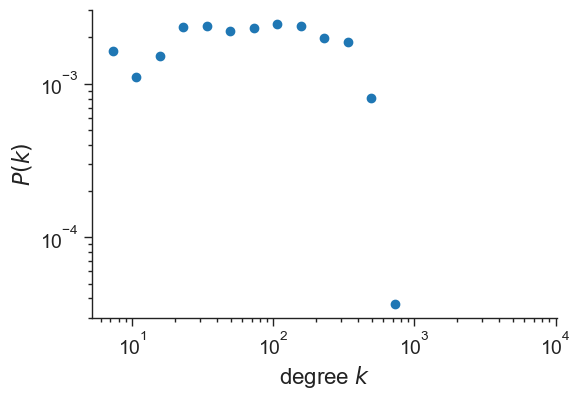

Average Clustering Coefficient:  0.6595735232443805
Average Shortest Path:  1.7188309905197776

Average Pokémon Degree in Gcluster: 27.688

Highest Pokemon degree (Pikachu): 874

Lowest Pokemon degree (excluding degree 0) is (Beheeyem): 6


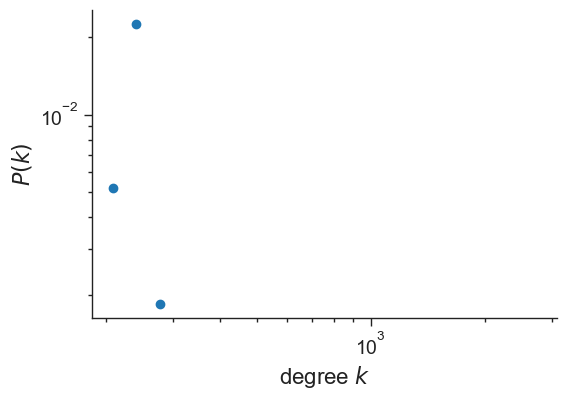

Average Clustering Coefficient:  0.26306033615768226
Average Shortest Path:  1.73697012663179

Average Pokémon Degree in Erdos: 237.77900552486187

Highest Pokemon degree (Huntail): 292

Lowest Pokemon degree (excluding degree 0) is (Snubbull): 194


In [47]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# change defaults to be less ug
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

# Function Defintions

# Function to plot a degree distribution graph (P(k) vs k graph)
def plot_degree_dist(G):
    
    degrees = [G.degree(n) for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    fig = plt.figure(figsize=(6,4))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    plt.show()


#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Read in the Pokemon Bipartite Projection network


G_cluster = nx.read_weighted_edgelist("../../datasets/clean/pokemon_projection_edges.csv", delimiter=",", nodetype=int, encoding='utf-8', comments="Source")
print(G_cluster.number_of_nodes())
print(G_cluster.number_of_edges())

# Let's plot the degree distribution

plot_degree_dist(G_cluster)

# ...and calculate the clustering coefficient and average path length

C = np.mean(list(nx.clustering(G_cluster).values()))
d = nx.average_shortest_path_length(G_cluster,weight=None)

print("Average Clustering Coefficient: ", C)
print("Average Shortest Path: ", d)


pokemon_nodes = {node for node in G_cluster.nodes if node < 10000}


pokemon_degrees = np.array([G.degree(n) for n in pokemon_nodes])
print("\nAverage Pokémon Degree in Gcluster:", np.mean(pokemon_degrees) if len(pokemon_degrees) > 0 else "N/A")




max_degree_pokemon_id = max(pokemon_nodes, key=lambda n: G_cluster.degree(n))
max_degree = G_cluster.degree(max_degree_pokemon_id)

max_degree_pokemon_name = pokemon.loc[pokemon['Id'] == max_degree_pokemon_id, 'Label'].iloc[0]

# Find the Pokémon with the lowest degree
min_degree_pokemon_id = min(pokemon_nodes, key=lambda n: G_cluster.degree(n))
min_degree_pokemon = G_cluster.degree(min_degree_pokemon_id)

# Access the Pokémon name using the ID from the DataFrame
min_degree_pokemon_name = pokemon.loc[pokemon['Id'] == min_degree_pokemon_id, 'Label'].iloc[0]

# Access the episode name using the ID from the DataFrame

# print("\nAverage Pokémon Degree:", np.mean(pokemon_degrees) if len(pokemon_degrees) > 0 else "N/A")

print(f"\nHighest Pokemon degree ({max_degree_pokemon_name}): {max_degree}")

print(f"\nLowest Pokemon degree (excluding degree 0) is ({min_degree_pokemon_name}): {min_degree_pokemon}")

#-----------------------------------------------------------------------------------------------------------------------------------------------------------------------
G = nx.Graph()
G.add_nodes_from(pokemon_ids)
weighted = nx.read_weighted_edgelist("../../datasets/clean/pokemon_projection_edges.csv", delimiter=",", nodetype=int, encoding='utf-8', comments="Source")
G.add_edges_from(weighted.edges())

GN = len(G.nodes()) # G.number_of_nodes()
max_L = GN*(GN-1)/2
actual_L = len(G.edges())
p = actual_L/max_L

ER = nx.erdos_renyi_graph(GN, p, directed=False)

plot_degree_dist(ER)

CER = np.mean(list(nx.clustering(ER).values()))
dER = nx.average_shortest_path_length(ER,weight=None)

print("Average Clustering Coefficient: ", CER)
print("Average Shortest Path: ", dER)



pokemon_nodes = {node for node in ER.nodes if node < 10000}

pokemon_degrees = np.array([ER.degree(n) for n in pokemon_nodes])
print("\nAverage Pokémon Degree in Erdos:", np.mean(pokemon_degrees) if len(pokemon_degrees) > 0 else "N/A")

max_degree_pokemon_id = max(pokemon_nodes, key=lambda n: ER.degree(n))
max_degree = ER.degree(max_degree_pokemon_id)

max_degree_pokemon_name = pokemon.loc[pokemon['Id'] == max_degree_pokemon_id, 'Label'].iloc[0]

# Find the Pokémon with the lowest degree
min_degree_pokemon_id = min(pokemon_nodes, key=lambda n: ER.degree(n))
min_degree_pokemon = ER.degree(min_degree_pokemon_id)

# Access the Pokémon name using the ID from the DataFrame
min_degree_pokemon_name = pokemon.loc[pokemon['Id'] == min_degree_pokemon_id, 'Label'].iloc[0]

# Access the episode name using the ID from the DataFrame

# print("\nAverage Pokémon Degree:", np.mean(pokemon_degrees) if len(pokemon_degrees) > 0 else "N/A")

print(f"\nHighest Pokemon degree ({max_degree_pokemon_name}): {max_degree}")

print(f"\nLowest Pokemon degree (excluding degree 0) is ({min_degree_pokemon_name}): {min_degree_pokemon}")


In [48]:
# This is just one instance of a random graph. We need to create an ensemble.

clustering_ER = []
short_path_ER = []

for i in range(100): # 1000 is better
    
    ER = nx.erdos_renyi_graph(GN, p, directed=False)
    C_ER = np.mean(list(nx.clustering(ER).values()))
    if nx.is_connected(ER)==True:
        d_ER = nx.average_shortest_path_length(ER,weight=None)
    clustering_ER.append(C_ER)
    short_path_ER.append(d_ER)
    
print(np.mean(clustering_ER))
print(np.std(clustering_ER))

print(np.mean(short_path_ER))
print(np.std(short_path_ER))

0.2628214981144463
0.0006723523203274617
1.7371807558793333
0.000672861134056485
